In [535]:
#Loading libraries 
import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [536]:
pp.__version__

'2.8.0'

In [537]:
pd.__version__

'1.0.4'

In [538]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [539]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [540]:
train.shape

(23856, 18)

In [541]:
test.shape

(15903, 17)

In [542]:
train.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [543]:
train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [544]:
train.DATE=pd.to_datetime(train.DATE)

In [545]:
train.dtypes

INCIDENT_ID                 object
DATE                datetime64[ns]
X_1                          int64
X_2                          int64
X_3                          int64
X_4                          int64
X_5                          int64
X_6                          int64
X_7                          int64
X_8                          int64
X_9                          int64
X_10                         int64
X_11                         int64
X_12                       float64
X_13                         int64
X_14                         int64
X_15                         int64
MULTIPLE_OFFENSE             int64
dtype: object

In [546]:
train['YEAR'], train['MONTH'] = train['DATE'].dt.year, train['DATE'].dt.month

In [547]:
train['DATE'],pd.DatetimeIndex(train.DATE).dayofweek // 5 == 1

(0       2004-07-04
 1       2017-07-18
 2       2017-03-15
 3       2009-02-13
 4       2005-04-13
            ...    
 23851   2002-01-11
 23852   1997-02-05
 23853   2012-04-03
 23854   2004-01-25
 23855   1994-11-08
 Name: DATE, Length: 23856, dtype: datetime64[ns],
 array([ True, False, False, ..., False,  True, False]))

In [594]:
train['DAY_OF_WEEK']=(pd.DatetimeIndex(train.DATE).dayofweek).astype(int)

In [549]:
#days = {0: "Monday", 1: "Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

In [550]:
train['DAY_OF_WEEK']=train['DAY_OF_WEEK'].replace(days)

In [551]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,YEAR,MONTH,DAY_OF_WEEK
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,...,1,174,1.0,92,29,36,0,2004,7,Sunday
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,...,1,236,1.0,103,142,34,1,2017,7,Tuesday
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,...,1,174,1.0,110,93,34,1,2017,3,Wednesday
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,...,1,249,1.0,72,29,34,1,2009,2,Friday
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,...,1,174,0.0,112,29,43,1,2005,4,Wednesday


In [552]:
### To Create the Simple report quickly
profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)

In [26]:
profile.to_file("output.html")

In [553]:
#Columns which have null values
train.isnull().any()

INCIDENT_ID         False
DATE                False
X_1                 False
X_2                 False
X_3                 False
X_4                 False
X_5                 False
X_6                 False
X_7                 False
X_8                 False
X_9                 False
X_10                False
X_11                False
X_12                 True
X_13                False
X_14                False
X_15                False
MULTIPLE_OFFENSE    False
YEAR                False
MONTH               False
DAY_OF_WEEK         False
dtype: bool

In [554]:
train[['INCIDENT_ID','DATE','X_1','X_2','X_3']].sort_values('DATE')

,INCIDENT_ID,DATE,X_1,X_2,X_3
19022,CR_1141,1991-01-01,0,22,22
13104,CR_2248,1991-01-02,0,33,32
1617,CR_3131,1991-01-03,1,36,34
6187,CR_3546,1991-01-04,0,39,39
1761,CR_821,1991-01-05,1,22,22
...,...,...,...,...,...
11299,CR_196992,2018-12-28,0,38,38
5055,CR_198746,2018-12-29,0,51,50
20479,CR_197301,2018-12-29,0,43,43
4238,CR_195253,2018-12-30,0,26,27


# The CR_Numbers don't necessarily follow a strict pattern

In [555]:
value_counts_dict = {c: train[c].value_counts().to_dict() for c in train.filter(like='X_', axis=1)}

In [556]:
value_counts_dict_test = {c: test[c].value_counts().to_dict() for c in test.filter(like='X_', axis=1)}

In [557]:
value_counts_dict

{'X_1': {0: 19036, 1: 3497, 7: 876, 5: 270, 3: 136, 4: 26, 2: 10, 6: 5},
 'X_2': {4: 4029,
  36: 2232,
  33: 2174,
  24: 1344,
  21: 1254,
  37: 962,
  49: 927,
  45: 908,
  3: 778,
  22: 672,
  47: 641,
  16: 631,
  9: 593,
  39: 513,
  25: 499,
  5: 437,
  6: 434,
  44: 428,
  40: 385,
  19: 370,
  26: 356,
  30: 266,
  42: 238,
  17: 238,
  18: 210,
  35: 186,
  46: 181,
  7: 166,
  38: 164,
  50: 160,
  15: 136,
  23: 122,
  2: 116,
  11: 107,
  8: 104,
  51: 103,
  29: 99,
  41: 93,
  14: 84,
  28: 78,
  32: 69,
  43: 69,
  34: 56,
  48: 55,
  20: 54,
  31: 43,
  27: 23,
  0: 22,
  1: 20,
  52: 19,
  13: 6,
  10: 2},
 'X_3': {4: 4029,
  34: 2232,
  32: 2174,
  24: 1344,
  23: 1254,
  37: 962,
  49: 927,
  45: 908,
  2: 778,
  22: 672,
  48: 641,
  15: 631,
  10: 593,
  39: 513,
  25: 499,
  5: 437,
  6: 434,
  44: 428,
  40: 385,
  19: 370,
  27: 356,
  35: 266,
  42: 238,
  16: 238,
  18: 210,
  30: 186,
  46: 181,
  8: 166,
  38: 164,
  51: 160,
  14: 136,
  21: 122,
  3: 116,
 

In [558]:
print ({key:value for key, value in value_counts_dict.items() if len(value)<20})

{'X_1': {0: 19036, 1: 3497, 7: 876, 5: 270, 3: 136, 4: 26, 2: 10, 6: 5}, 'X_4': {6: 5497, 2: 4791, 0: 3335, 7: 2890, 4: 2027, 3: 1871, 9: 1360, 10: 1242, 1: 841, 5: 2}, 'X_5': {5: 7368, 1: 6818, 3: 4973, 0: 4695, 2: 2}, 'X_6': {1: 3461, 5: 2679, 6: 2629, 4: 2319, 15: 2318, 2: 2298, 7: 2286, 3: 1708, 8: 1405, 9: 1267, 16: 620, 12: 210, 11: 200, 18: 162, 13: 139, 17: 110, 10: 25, 14: 18, 19: 2}, 'X_7': {0: 3461, 6: 2679, 4: 2629, 2: 2319, 10: 2318, 7: 2298, 1: 2286, 5: 1708, 3: 1405, 8: 1267, 12: 620, 16: 210, 17: 200, 13: 162, 18: 139, 11: 110, 15: 25, 14: 18, 9: 2}, 'X_9': {5: 10559, 6: 9508, 2: 3040, 3: 452, 1: 175, 0: 118, 4: 4}}


In [559]:
print ({key:sorted(value.keys()) for key, value in value_counts_dict.items() if len(value)<30})

{'X_1': [0, 1, 2, 3, 4, 5, 6, 7], 'X_4': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10], 'X_5': [0, 1, 2, 3, 5], 'X_6': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'X_7': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'X_8': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 29, 30, 50, 99], 'X_9': [0, 1, 2, 3, 4, 5, 6], 'X_10': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 22, 30, 40, 50, 58, 90], 'X_12': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 15.0, 16.0, 17.0, 20.0, 30.0, 40.0, 50.0, 58.0, 90.0], 'X_15': [0, 4, 5, 8, 9, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 31, 32, 34, 35, 36, 38, 39, 40, 41, 43, 46, 48, 50]}


In [560]:
print ({key:sorted(value.keys()) for key, value in value_counts_dict_test.items() if len(value)<20})

{'X_1': [0, 1, 2, 3, 4, 5, 6, 7], 'X_4': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10], 'X_5': [0, 1, 2, 3, 5], 'X_6': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'X_7': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'X_9': [0, 1, 2, 3, 4, 5, 6], 'X_10': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 20, 28, 40], 'X_12': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 18.0, 20.0, 40.0]}


In [561]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

In [562]:
train.filter(like='X_', axis=1).apply(minMax)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
min,0,0,0,0,0,1,0,0,0,1,0,0.0,0,0,0
max,7,52,52,10,5,19,18,99,6,90,332,90.0,116,142,50


In [563]:
test.filter(like='X_', axis=1).apply(minMax)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
min,0,0,0,0,0,1,0,0,0,1,0,0.0,0,0,0
max,7,52,52,10,5,19,18,50,6,40,332,40.0,117,142,50


In [564]:
##Based on the min and max values we can arbitrarily consider below below columns into categorical and continuous

#Cat:X_1,X_4,X_5
#Cont:X_2,X_3,X_11(high values),X_12(float values),X_13,X_14,X_15

#Similar
#X_6,X_7-->0-19
#X_8,X_10-->0-99(somewhat similar) 


In [565]:
train.dtypes

INCIDENT_ID                 object
DATE                datetime64[ns]
X_1                          int64
X_2                          int64
X_3                          int64
X_4                          int64
X_5                          int64
X_6                          int64
X_7                          int64
X_8                          int64
X_9                          int64
X_10                         int64
X_11                         int64
X_12                       float64
X_13                         int64
X_14                         int64
X_15                         int64
MULTIPLE_OFFENSE             int64
YEAR                         int64
MONTH                        int64
DAY_OF_WEEK                 object
dtype: object

# Visualization

In [566]:
#Univariate Analysis

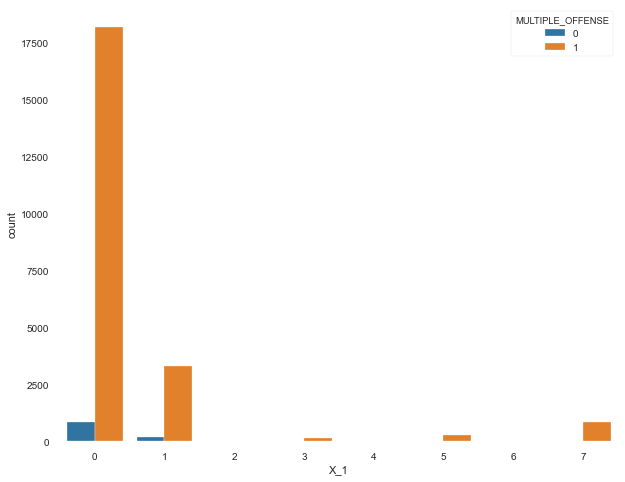

In [567]:
sns.countplot(x='X_1',data=train,hue="MULTIPLE_OFFENSE") #Max at 0
#sns.countplot(x='X_2',data=train)  #Max at 4
#sns.countplot(x='X_3',data=train)
#sns.countplot(x='X_4',data=train)
#sns.countplot(x='X_5',data=train)
#sns.countplot(x='X_6',data=train)
#sns.countplot(x='X_7',data=train)
#sns.countplot(x='X_8',data=train)
#sns.countplot(x='X_9',data=train)
#sns.countplot(x='X_10',data=train)
#sns.countplot(x='X_11',data=train)
#sns.countplot(x='X_12',data=train)
#sns.countplot(x='X_13',data=train)
#sns.countplot(x='X_14',data=train)
#sns.countplot(x='X_15',data=train)
#sns.countplot(x='MULTIPLE_OFFENSE',data=train) #1 values are high.Its skewed.

In [1]:
#Cat vs Cat
sns.catplot(x="X_1", hue="MULTIPLE_OFFENSE", data=train, kind="count", height=6) # X1 >1 , we get mostly 1(hacked)
#sns.factorplot(x="X_2", hue="MULTIPLE_OFFENSE", data=train, kind="count", size=10)
#sns.factorplot(x="X_4", hue="MULTIPLE_OFFENSE", data=train, kind="count", size=10) #No 5 values for X_4
#sns.factorplot(x="X_5", hue="MULTIPLE_OFFENSE", data=train, kind="count", size=10) #No 2 values for X_5
#sns.factorplot(x="X_10", hue="MULTIPLE_OFFENSE", data=train, kind="count", size=10) #Most of the values are 0,1
#sns.factorplot(x="X_14", hue="MULTIPLE_OFFENSE", data=train, kind="count", size=20) # Though range is more, it looks discrete
#sns.factorplot(x="X_15", hue="MULTIPLE_OFFENSE", data=train, kind="count", size=20)  #Highest at 34

NameError: name 'sns' is not defined

C:\Users\sowja\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



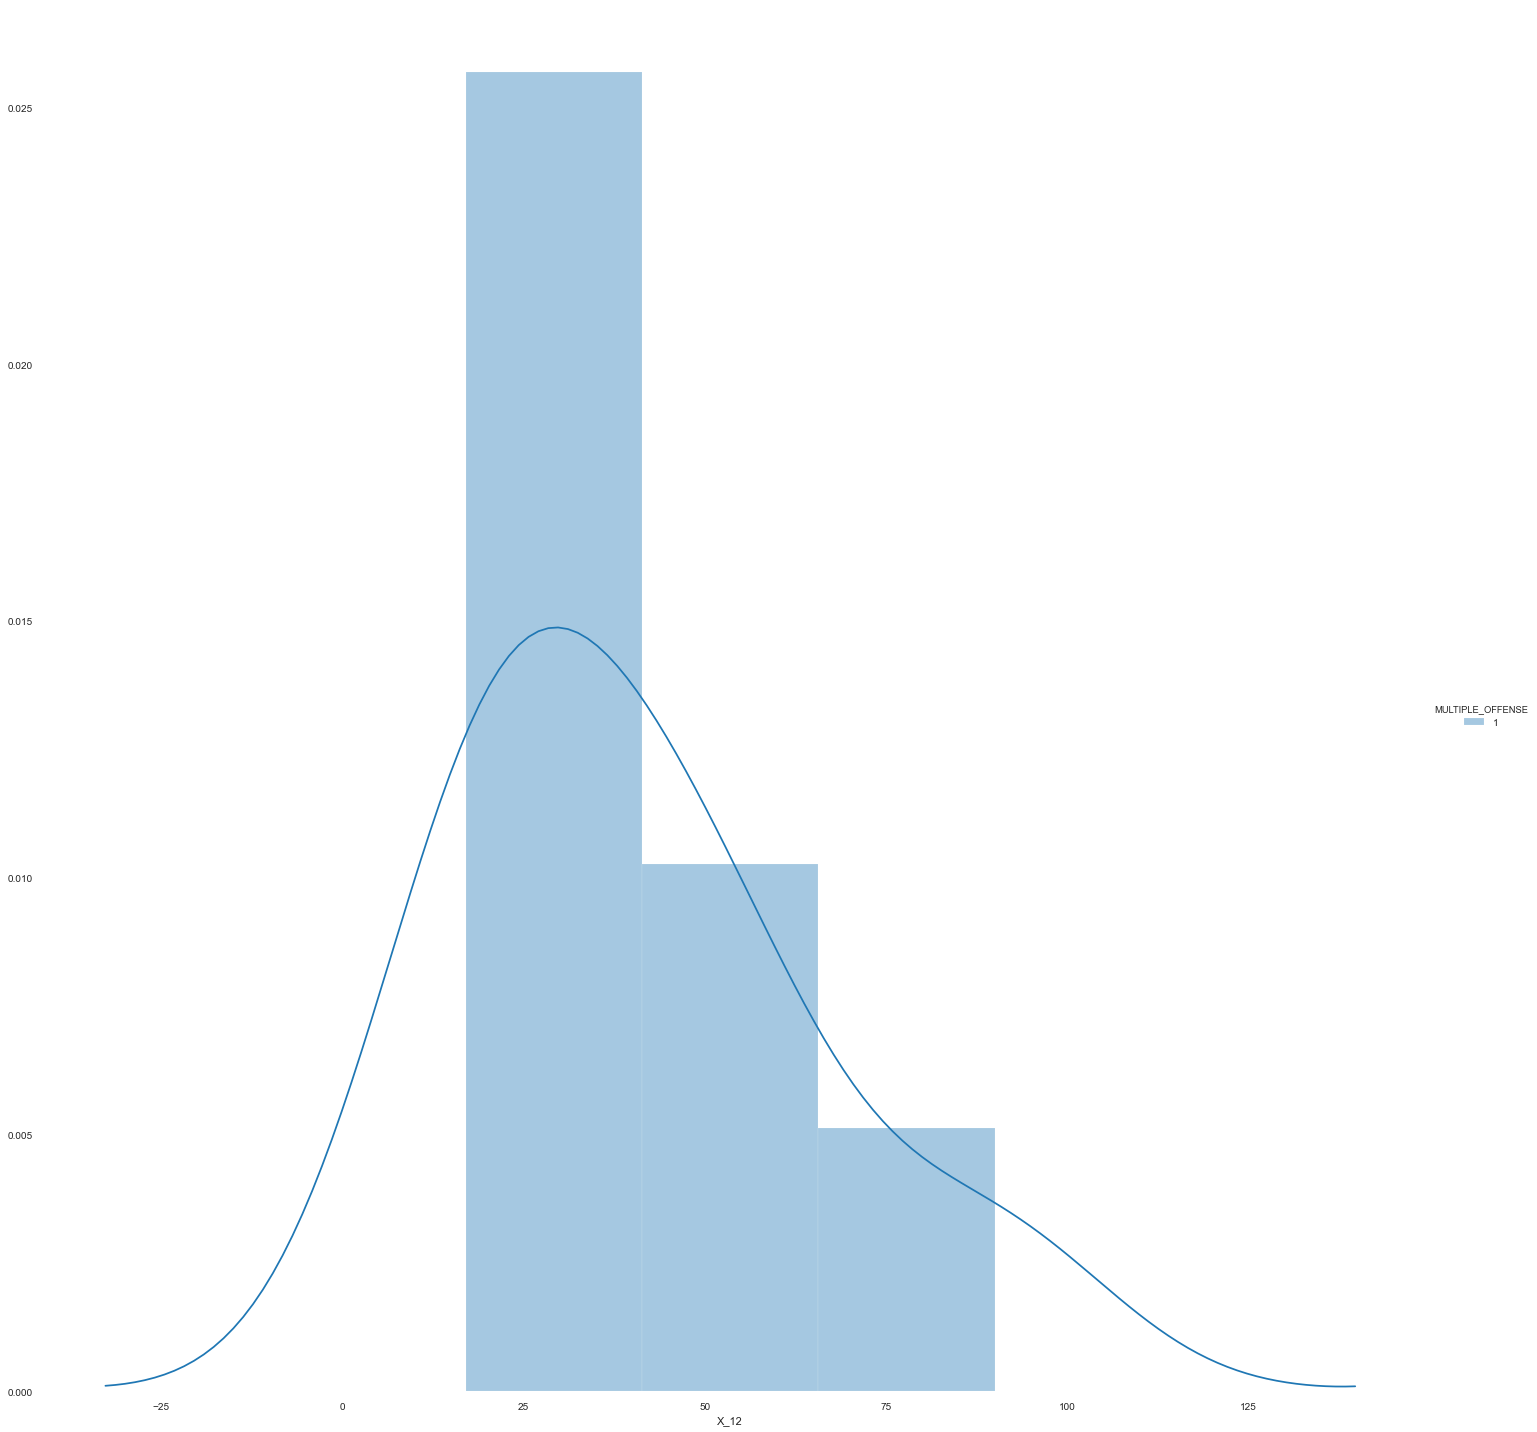

In [569]:
#continuous  vs categorical
#sns.FacetGrid(train, hue="MULTIPLE_OFFENSE",size=20).map(sns.kdeplot, "X_12").add_legend()
#sns.FacetGrid(train, hue="MULTIPLE_OFFENSE",size=20).map(sns.distplot, "X_12").add_legend()

sns.FacetGrid(train[train['X_12']>16], hue="MULTIPLE_OFFENSE",size=20).map(sns.distplot, "X_12").add_legend()

#We conclude here that values X_12 > 17 always have MULTIPLE_OFFENSE=1

#sns.FacetGrid(train, hue="MULTIPLE_OFFENSE",size=10).map(sns.distplot, "X_8").add_legend()
#sns.FacetGrid(train[train['X_8']>20], hue="MULTIPLE_OFFENSE",size=10).map(sns.kdeplot, "X_8").add_legend()

#We conclude here that values X_8 >= 20 always have MULTIPLE_OFFENSE=1


C:\Users\sowja\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



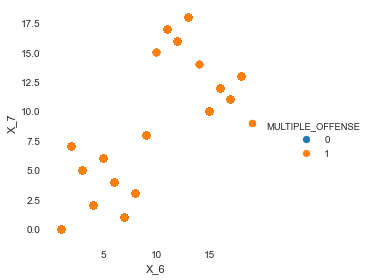

In [570]:
sns.FacetGrid(train,hue='MULTIPLE_OFFENSE',size=4).map(plt.scatter,"X_6","X_7").add_legend();

# These plots are not helpful, since its quite difficult to get any inference

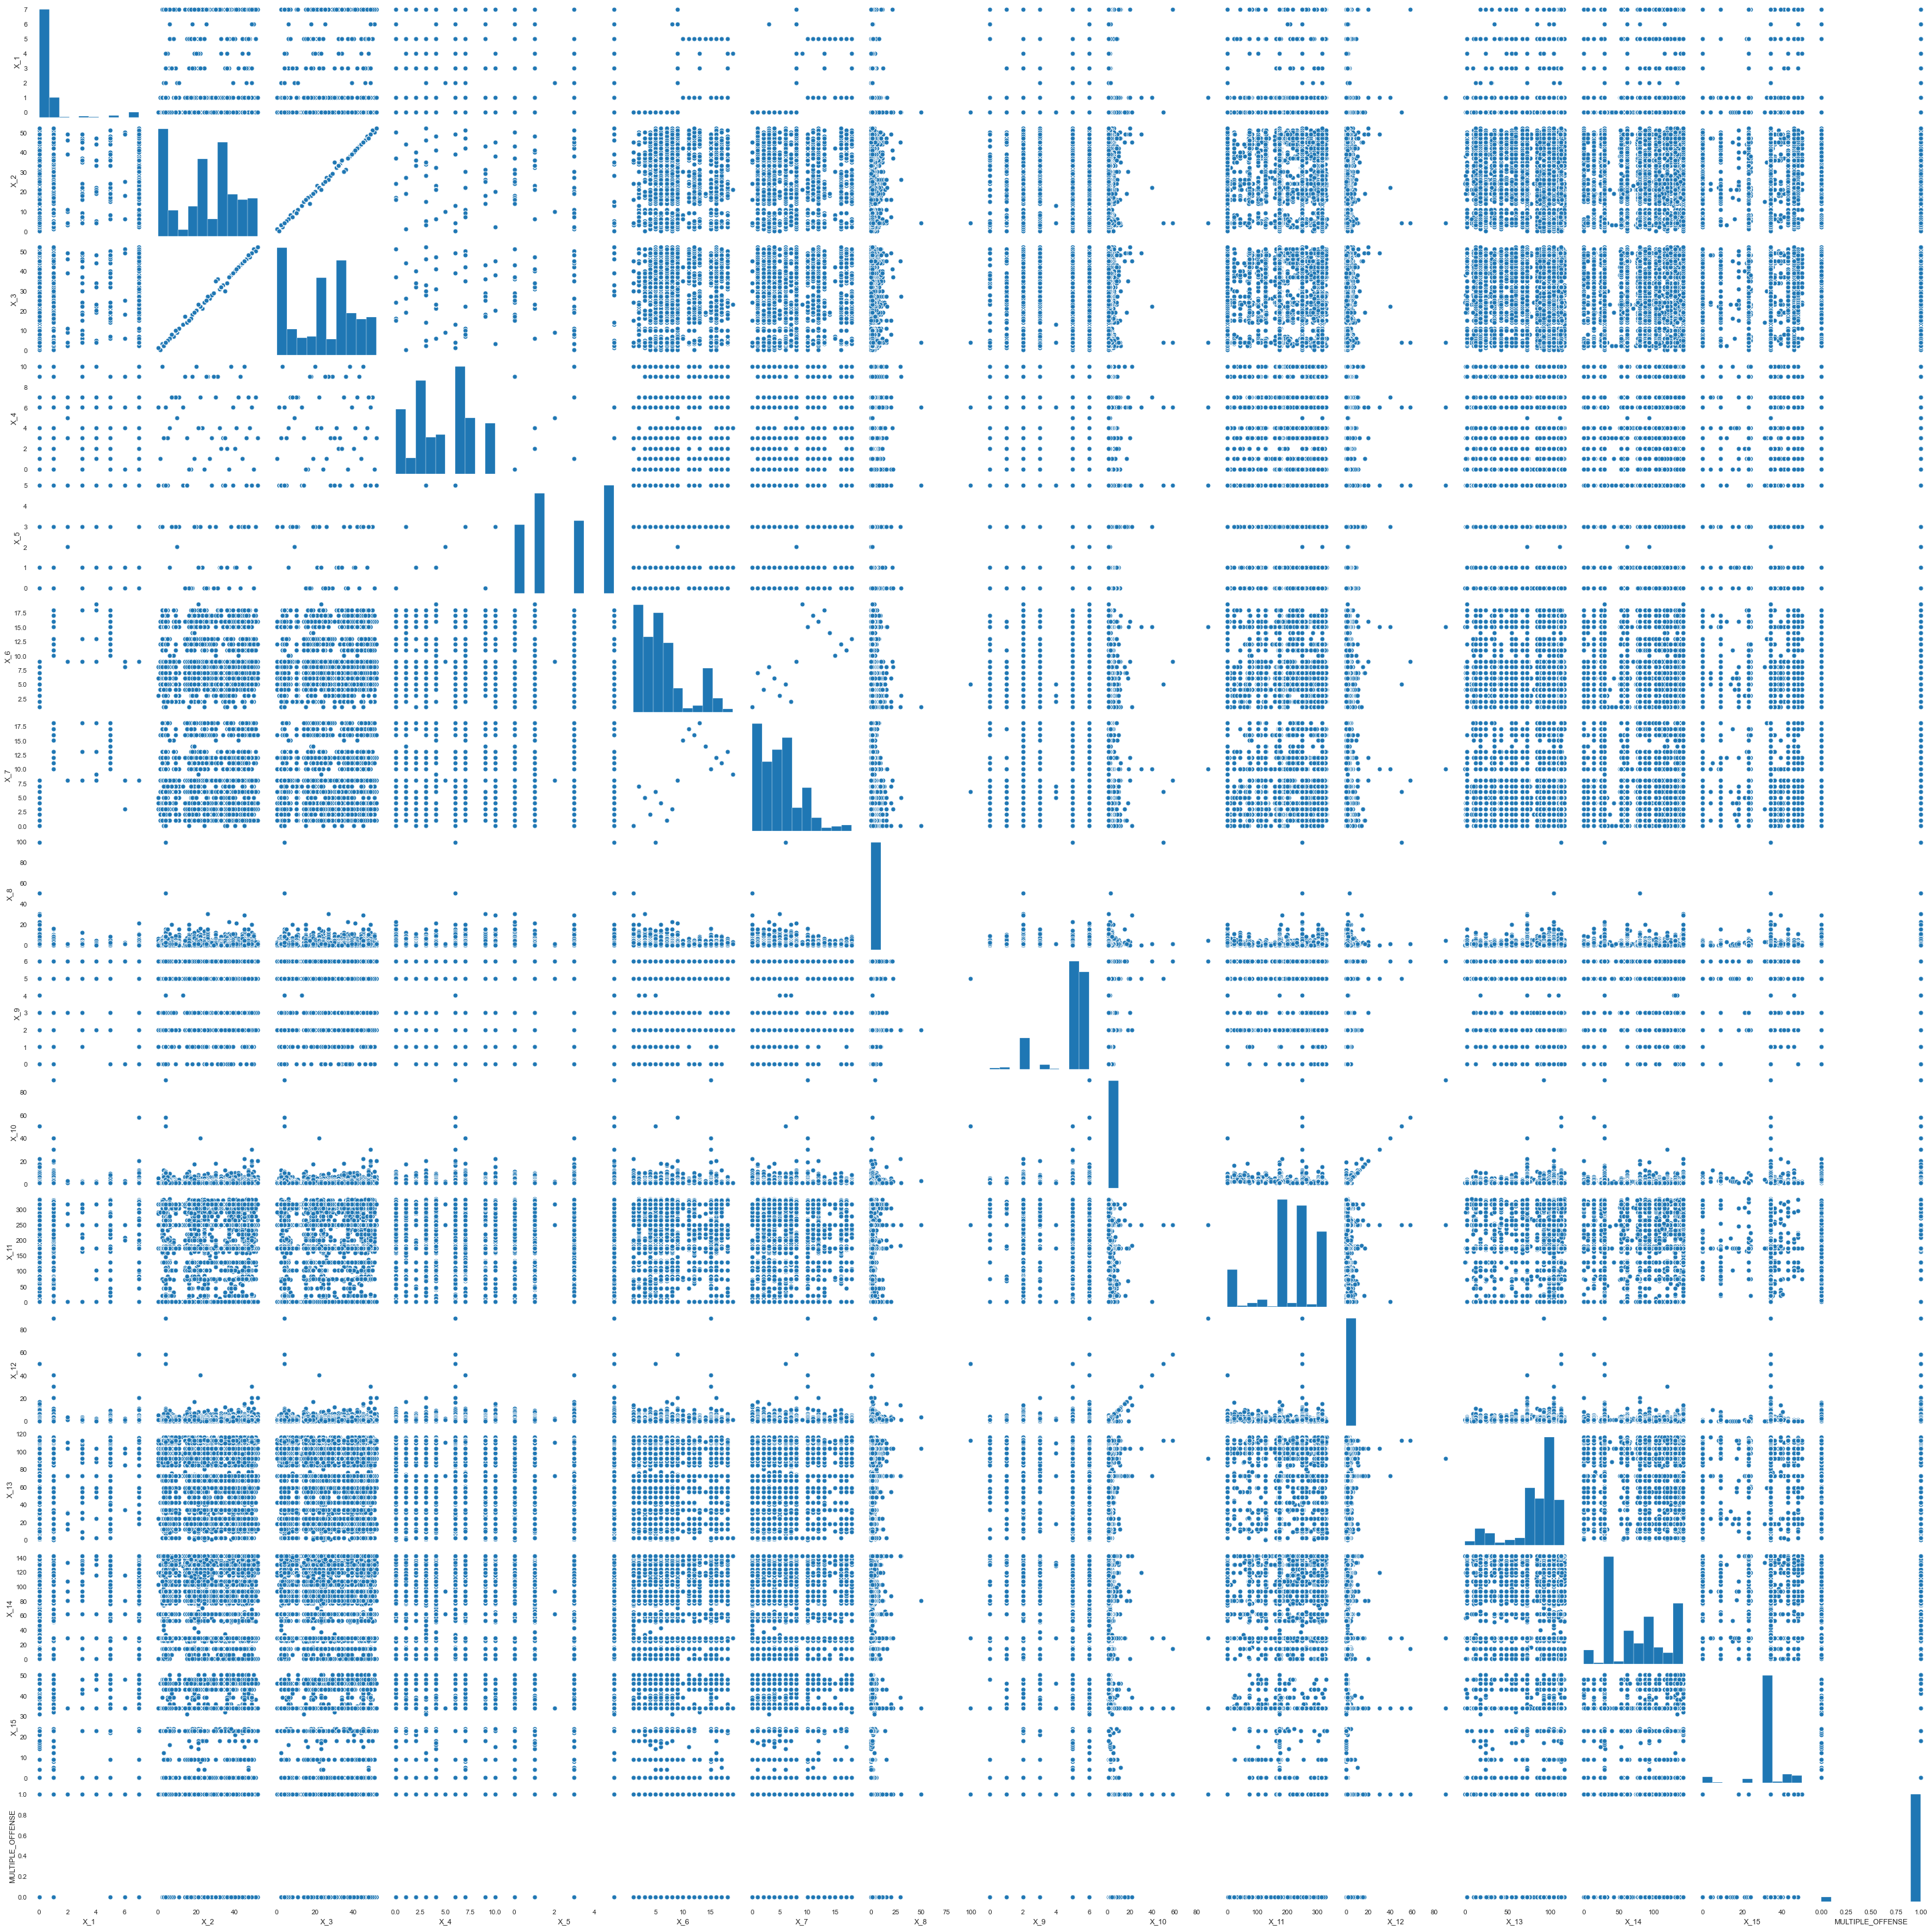

In [571]:
#train.filter(like='X_', axis=1).columns
features = train.filter(like='X_', axis=1).columns

PairPlotData=train[features].join(train['MULTIPLE_OFFENSE'])
sns.pairplot(PairPlotData)

# This is not a good way to view pairwise plots , especially when there are many features

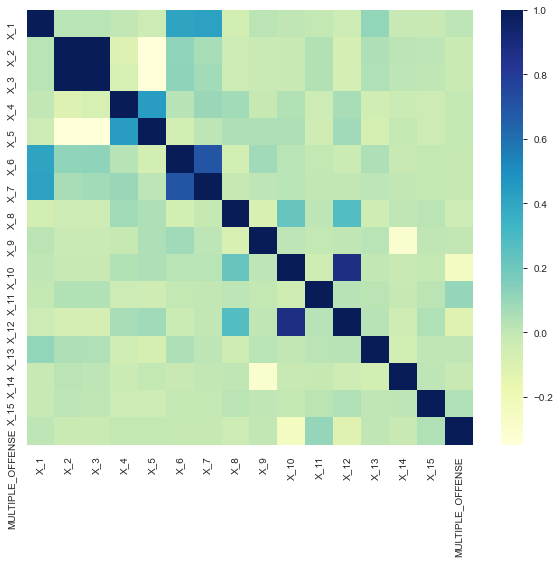

In [572]:
corr=train.filter(like='X_', axis=1).join(train['MULTIPLE_OFFENSE']).corr()
sns.heatmap(corr,cmap="YlGnBu")

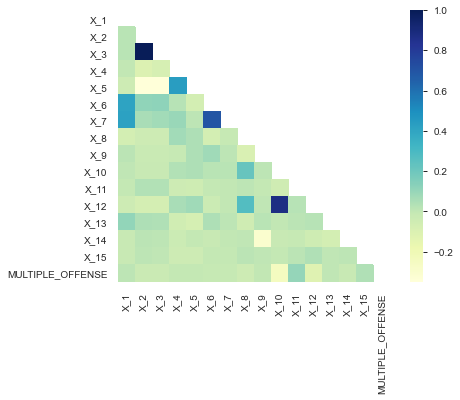

In [573]:
#removing the diagnol elements in heatmap

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, cmap="YlGnBu", square=True)

In [574]:
#Checking correlation of all fields with MULTIPLE_OFFENSE

print (corr['MULTIPLE_OFFENSE'].sort_values(ascending=False)[:5], '\n') #top 5 values
print ('----------------------')
print (corr['MULTIPLE_OFFENSE'].sort_values(ascending=False)[-5:]) #last 5 values

#here we see MULTIPLE_OFFENSE does'nt have a good correlation with any of the X_ columns

MULTIPLE_OFFENSE    1.000000
X_11                0.105088
X_15                0.044916
X_1                 0.014034
X_13                0.006512
Name: MULTIPLE_OFFENSE, dtype: float64 

----------------------
X_3    -0.027218
X_2    -0.027293
X_8    -0.033397
X_12   -0.113061
X_10   -0.242596
Name: MULTIPLE_OFFENSE, dtype: float64


In [575]:
#Checking correlation of all fields with each other

print (corr['X_2'].sort_values(ascending=False)[:3], '\n') #top 3 values
print ('----------------------')
print (corr['X_2'].sort_values(ascending=False)[-3:]) #last 3 values

#here we see MULTIPLE_OFFENSE does'nt have a good correlation with any of the X_ columns

#Correlated elements: [X2,X3]-0.99,[X_10,X_12]-0.877


X_2    1.000000
X_3    0.996985
X_6    0.119718
Name: X_2, dtype: float64 

----------------------
X_12   -0.067720
X_4    -0.104321
X_5    -0.349190
Name: X_2, dtype: float64


In [576]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(train, x='X_10', y='X_11', z='X_14',log_x=True,
    log_y=False,
    log_z=False,color='MULTIPLE_OFFENSE')
fig.show()

In [577]:
px.scatter_3d?

C:\Users\sowja\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



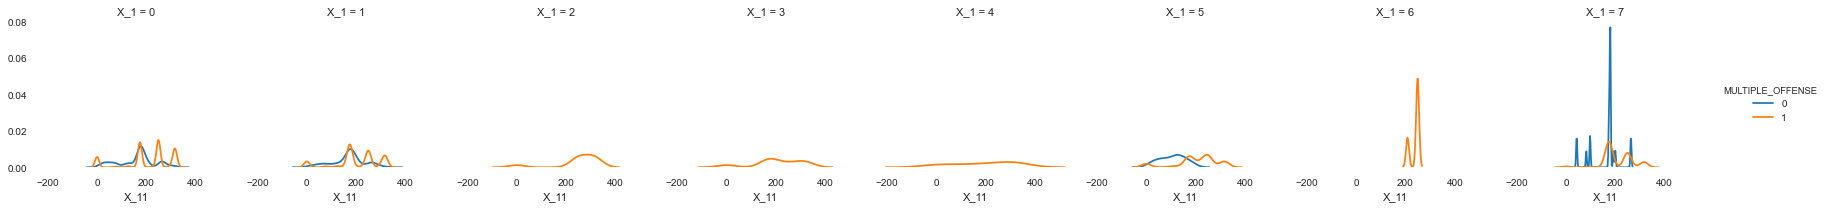

In [578]:
#Box plots- Multivariate analysis

sns.FacetGrid(train, col="X_1", hue="MULTIPLE_OFFENSE").map(sns.kdeplot, "X_11").add_legend()

In [579]:
#Trying to do a Chi-Square test

table_1=pd.crosstab(train['X_2'],train['X_4'])
print(table_1)

val=stats.chi2_contingency(table_1)

Observed_Values = table_1.values 
print("Observed Values :-\n",Observed_Values)

X_4    0    1     2    3     4   5     6    7    9    10
X_2                                                     
0       0    0     0    0     0   0    22    0    0    0
1       0   20     0    0     0   0     0    0    0    0
2       0    0     0    0     0   0     0    0    0  116
3       0    0     0  778     0   0     0    0    0    0
4       0    0     0    0     0   0  4029    0    0    0
5       0    0     0  437     0   0     0    0    0    0
6       0    0     0    0   434   0     0    0    0    0
7       0    0     0    0     0   0     0  166    0    0
8       0    0     0    0     0   0     0  104    0    0
9       0    0     0    0     0   0     0  593    0    0
10      0    0     0    0     0   2     0    0    0    0
11      0    0     0    0     0   0     0  107    0    0
13      0    0     0    0     0   0     6    0    0    0
14      0    0     0    0     0   0     0    0   84    0
15      0    0     0  136     0   0     0    0    0    0
16    631    0     0    0     0

In [580]:
val

(214704.00000000003,
 0.0,
 459,
 array([[3.07553655e+00, 7.75570087e-01, 4.41825956e+00, 1.72543595e+00,
         1.86929913e+00, 1.84439973e-03, 5.06933266e+00, 2.66515761e+00,
         1.25419182e+00, 1.14537223e+00],
        [2.79594232e+00, 7.05063716e-01, 4.01659960e+00, 1.56857814e+00,
         1.69936284e+00, 1.67672703e-03, 4.60848424e+00, 2.42287056e+00,
         1.14017438e+00, 1.04124748e+00],
        [1.62164655e+01, 4.08936955e+00, 2.32962777e+01, 9.09775319e+00,
         9.85630449e+00, 9.72501677e-03, 2.67292086e+01, 1.40526492e+01,
         6.61301140e+00, 6.03923541e+00],
        [1.08762156e+02, 2.74269785e+01, 1.56245724e+02, 6.10176895e+01,
         6.61052146e+01, 6.52246814e-02, 1.79270037e+02, 9.42496647e+01,
         4.43527834e+01, 4.05045272e+01],
        [5.63242580e+02, 1.42035086e+02, 8.09143989e+02, 3.15990065e+02,
         3.42336645e+02, 3.37776660e-01, 9.28379150e+02, 4.88087274e+02,
         2.29688129e+02, 2.09759306e+02],
        [6.10913397e+01, 1.

In [581]:
Expected_Values=val[3]

In [582]:
Expected_Values

array([[3.07553655e+00, 7.75570087e-01, 4.41825956e+00, 1.72543595e+00,
        1.86929913e+00, 1.84439973e-03, 5.06933266e+00, 2.66515761e+00,
        1.25419182e+00, 1.14537223e+00],
       [2.79594232e+00, 7.05063716e-01, 4.01659960e+00, 1.56857814e+00,
        1.69936284e+00, 1.67672703e-03, 4.60848424e+00, 2.42287056e+00,
        1.14017438e+00, 1.04124748e+00],
       [1.62164655e+01, 4.08936955e+00, 2.32962777e+01, 9.09775319e+00,
        9.85630449e+00, 9.72501677e-03, 2.67292086e+01, 1.40526492e+01,
        6.61301140e+00, 6.03923541e+00],
       [1.08762156e+02, 2.74269785e+01, 1.56245724e+02, 6.10176895e+01,
        6.61052146e+01, 6.52246814e-02, 1.79270037e+02, 9.42496647e+01,
        4.43527834e+01, 4.05045272e+01],
       [5.63242580e+02, 1.42035086e+02, 8.09143989e+02, 3.15990065e+02,
        3.42336645e+02, 3.37776660e-01, 9.28379150e+02, 4.88087274e+02,
        2.29688129e+02, 2.09759306e+02],
       [6.10913397e+01, 1.54056422e+01, 8.77627012e+01, 3.42734323e+01,
   

In [583]:
no_of_rows=table_1.shape[0]
no_of_columns=table_1.shape[1]
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 459


In [584]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [585]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 43536.000000000015


In [586]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 509.947486260048


In [587]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  459


In [588]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [589]:
#Using Chi Square test, I have seen if there is a relationship between categorical variables
#X10,X_12 -- There is a relationship between 2 categorical variables
#X_1,X_2 --There is no relationship between 2 categorical variables
#X_2,X_3--There is a relationship between 2 categorical variables
#X_2,X_4--There is a relationship between 2 categorical variables

#But the chi-quare test will not give us proper inferences, 
#the target label is skewed and most of the categories are also skewed

In [590]:
train[train['X_12'].isna()].MULTIPLE_OFFENSE.value_counts()

1    182
Name: MULTIPLE_OFFENSE, dtype: int64

In [591]:
#Since we came to a conclusion from our plots that anything above X_12=16 is hacked, we will replace these null values with some 
#common 999.

train['X_12']=train['X_12'].fillna('999')

In [595]:
#Train-Test split

from sklearn import model_selection

features = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'YEAR', 'MONTH', 'DAY_OF_WEEK']
X = train[ features ]
y = train['MULTIPLE_OFFENSE']

X_train, X_eval, y_train, y_eval = model_selection.train_test_split(X, y, test_size=0.1, random_state=1)


In [599]:
#Implementing Adaboost

from sklearn import tree,ensemble

base_estimator = tree.DecisionTreeClassifier()
ada_estimator = ensemble.AdaBoostClassifier(base_estimator)
ada_grid = {'base_estimator__max_depth': [3,4,5], 'n_estimators':list(range(30, 200, 50)), 'learning_rate':[0.1,0.3,0.5,1.0]}
ada_grid_estimator = model_selection.GridSearchCV(ada_estimator, ada_grid, scoring='recall', cv=10)
ada_grid_estimator.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,


In [600]:
print(ada_grid_estimator.best_params_)
print(ada_grid_estimator.best_score_)
print(ada_grid_estimator.best_estimator_.estimators_)
print(ada_grid_estimator.score(X_train, y_train))

{'base_estimator__max_depth': 3, 'learning_rate': 0.3, 'n_estimators': 130}
1.0
[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1893396380, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=799921630, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, c

1.0


In [601]:
print(ada_grid_estimator.score(X_eval, y_eval))

1.0


In [604]:
test.DATE=pd.to_datetime(test.DATE)

In [605]:
test['YEAR'], test['MONTH'] = test['DATE'].dt.year, test['DATE'].dt.month

In [606]:
test['DAY_OF_WEEK']=(pd.DatetimeIndex(test.DATE).dayofweek).astype(int)

In [607]:
test['X_12']=test['X_12'].fillna('999')

In [611]:
X_test = test[features]
test['MULTIPLE_OFFENSE'] = ada_grid_estimator.best_estimator_.predict(X_test)
test.to_csv('submission_10June.csv', columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'], index=False)

In [529]:
model_selection.GridSearchCV?

In [450]:
from sklearn.ensemble import RandomForestClassifier

#Create a copy to work with
X=train.copy()

#Save and drop labels
y=train.MULTIPLE_OFFENSE
X=X.drop(['MULTIPLE_OFFENSE'],axis=1)
X=X.drop(['DATE'],axis=1)

#fill NaNs
X=X.fillna(-999)

In [280]:
X.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,YEAR,MONTH,DAY_OF_WEEK
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,2004,7,Sunday
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,2017,7,Tuesday
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,2017,3,Wednesday
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,2009,2,Friday
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,2005,4,Wednesday


In [276]:
#Label encoder
for c in X.columns[X.dtypes == 'int64']:
    X[c]=X[c].factorize()[0]

In [277]:
del X['DATE']

KeyError: 'DATE'

In [26]:
X.X_11

0        0
1        1
2        0
3        2
4        0
        ..
23851    0
23852    0
23853    0
23854    7
23855    2
Name: X_11, Length: 23856, dtype: int64

In [25]:
X.X_11.value_counts()

0      7275
2      6930
4      4500
6      2553
3       438
       ... 
111       1
103       1
119       1
104       1
87        1
Name: X_11, Length: 133, dtype: int64

In [27]:
train.X_11.value_counts()

174    7275
249    6930
316    4500
0      2553
303     438
       ... 
232       1
248       1
264       1
287       1
319       1
Name: X_11, Length: 133, dtype: int64

In [30]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

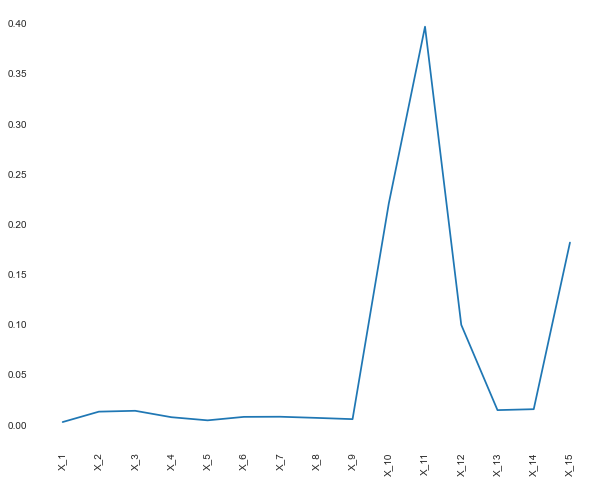

In [31]:
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]),X.columns.tolist(),rotation=90);

NameError: name 'rf' is not defined

In [294]:
#Lets implement Logistic Regression




,A,B,C
0,1,0,7
1,4,4,5
2,6,4,1
